![Images](Images/ITAcademy.png)
# DATA SCIENCE: S06.T01
#### Created by: Dani Planas Montserrat


In [17]:
##########################################################################
##           DATA SCIENCE: S06.T01: Nivell 1 Exercici 1                 ##
##########################################################################
# Exercici 1: Agafa un conjunt de dades de tema esportiu que t'agradi i 
# selecciona un atribut del conjunt de dades. Calcula la moda, la mediana, 
# la desviació estàndard i la mitjana aritmètica. 

# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import re
import statistics

# Import Library
from ip2geotools.databases.noncommercial import DbIpCity


warnings.filterwarnings('ignore')


In [18]:
#************************************************************************************
#***************************     READ Files Functions      **************************
#************************************************************************************
#Function for Read *.csv file (Import Data)
def openFileTXT(path_name):
    
    # Read *.csv file (Import Data)
    df = pd.read_csv(path_name, sep='::', names=movie_column_l, encoding = 'ISO-8859-1', index_col=0, engine='python')

    return df

#Function for Read *.txt file (Import Data)
def openFileTable(path_name, file_name, separator, movie_column_l):

    # Read *.txt file (Import Data)
    df = pd.read_table(path_name + file_name, sep=separator, names=movie_column_l, header=None,  engine='python')
    
    return df

#Function for Read *.parquet file (Import Data)
def openFileParquet(path_name, file_name):
    
    #Import library pyarrow for read files with extenison "parquet" 
    import pyarrow 
    # Read *.txt file (Import Data)
    #df = pd.read_table(path_name + file_name, sep=separator, names=movie_column_l, header=None,  engine='python')
    df = pd.read_parquet(path_name + file_name, engine='pyarrow')
    
    return df




In [19]:
#************************************************************************************
#******************************      PLOT Functions     *****************************
#************************************************************************************
#Function plot, type Histogram (one categoric value)
def plotHistogram(df):
    
    # create a dataset
    height = df
    bars = df.index
    x_pos = np.arange(len(bars))

    # Create bars with different colors
    #plt.bar(x_pos, height, color=['black', 'red', 'green', 'blue', 'cyan'])
    plt.bar(x_pos, height, color=['green'])
    # Create names on the x-axis
    plt.xticks(x_pos,bars)

    # Show graphic
    fig = plt.gcf()
    plt.show()

    return fig

#Function plot, type Histogram (one Numeric value)
def plotHistogram2(df,paramNum):
    
    # create a dataset
    height = df[paramNum]
    bars = df.index
    x_pos = np.arange(len(bars))

    # Create bars with different colors
    #plt.bar(x_pos, height, color=['black', 'red', 'green', 'blue', 'cyan'])
    plt.bar(x_pos, height, color=['yellow'])
    # Create names on the x-axis
    plt.xticks(x_pos,bars)

    # Show graphic
    fig = plt.gcf()
    plt.show()

    return fig

def plotDensityPlot(df):
    # library & dataset
    import seaborn as sns
    
    # set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
    sns.set(style="darkgrid")

    # plotting both distibutions on the same figure
    fig = sns.kdeplot(df, shade=True, color="r")
    #fig = sns.kdeplot(df[paramNum2], shade=True, color="b")

    # Show graphic
    fig = plt.gcf()
    plt.show()

    return fig

#Function plot, with Seaborn Library and type ScatterPlot
def plotSnsScatterplot(df, paramNum1, paramNum2, title, ylabel, xlabel):

    g = sns.FacetGrid(df)
    g.map(sns.scatterplot, paramNum1, paramNum2, alpha=.7)
    g.add_legend()

    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    
    # Show graphic
    fig = plt.gcf()
    plt.show()

    return fig

#Function plot, with Seaborn Library and type LinePlot
def plotSnsLineplot(df, paramNum1, paramNum2, title, ylabel, xlabel):

    g = sns.FacetGrid(df)
    g.map(sns.lineplot, paramNum1, paramNum2, alpha=.7)
    g.add_legend()
    
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    
    # Show graphic
    fig = plt.gcf()
    plt.show()

    return fig

#Function plot, with Seaborn Library and type HistPlot
def plotSnsHistplot(df, paramNum1, title, ylabel, xlabel, binsNum):
  
    sns.histplot(data=df, x=paramNum1, bins=binsNum, kde=True)
    #g.add_legend()
    
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    
    # Show graphic
    fig = plt.gcf()
    plt.show()

    return fig

#Function plot, type Stacked Area Chart (with 3 numeric values and 1 categoric value)   
def plotBarplotMultiple(df, paramNum1, paramNum2, paramNum3, Sel3):
        # libraries
        import numpy as np
        import matplotlib.pyplot as plt

        # width of the bars
        barWidth = 0.3
        
        # Choose the height of the blue bars
        bars1 = df

        if (Sel3 == 2):
            # Choose the height of the cyan bars
            bars2 = df[paramNum2] 

        if (Sel3 == 3):
            # Choose the height of the cyan bars
            bars3 = df[paramNum3] 
        
        # Choose the height of the error bars (bars1)
        yer1 = np.arange(len(bars1))

        # Choose the height of the error bars (bars2)
        yer2 = np.arange(len(bars1))
        
        #print(title) by groups of bars
        title = df.index 
        
        # The x position of bars
        r1 = np.arange(len(bars1))
        r2 = [x + barWidth for x in r1]
        r3 = [x + barWidth for x in r2]

        # Create blue bars
        plt.bar(r1, bars1, width = barWidth, color = 'yellow', edgecolor = 'black', yerr=yer1, capsize=5, label=paramNum1)
        
        if (Sel3 == 2):
            # Create cyan bars
            plt.bar(r2, bars2, width = barWidth, color = 'yellow', edgecolor = 'black', yerr=yer2, capsize=7, label=paramNum2)

        if (Sel3 == 3):
             # Create cyan bars
             plt.bar(r3, bars3, width = barWidth, color = 'green', edgecolor = 'black', yerr=yer2, capsize=7, label=paramNum3)
   
        # general layout
        plt.xticks([r + barWidth for r in range(len(bars1))], title)
        plt.ylabel('height')
        #plt.legend()

        # Show graphic
        fig = plt.gcf()
        plt.show()

        return fig

#Function plot, show a World Map with Geolocation points from a dataset
def plotWorldMapGeolocPoints(df, pLatitud, pLongitud):

        bars3 = df[pLatitud] 

        #Dibujar mapas
        from mpl_toolkits.basemap.test import Basemap
        import matplotlib.pyplot as plt


        #Figure Size
        plt.figure(figsize=(16,12))

        #Projection Type : robin, ortho ...
        my_map=Basemap(projection='robin',lon_0=0,lat_0=0)  #'robin' ,'ortho'

        #Draw cost lines and countries
        my_map.drawcoastlines()
        my_map.drawcountries()

        #Define colours
        my_map.drawcountries(color='#303338')
        my_map.drawmapboundary(fill_color='#c0eaff')
        my_map.drawcoastlines(color='#324c87')
        my_map.fillcontinents(color='#ebe7d5', lake_color='#c0eaff')


        #Place the different locations on the map
        for i in range(len(df[pLongitud])):     
            x,y = my_map(df[pLongitud][i], df[pLatitud][i])
            my_map.plot(x,y, color='g', marker = 'o' , markersize=10 , alpha = 0.9)

        return my_map
    

In [20]:
#************************************************************************************
#***************************     GEOLOCATION Functions     **************************
#************************************************************************************

/#Function that give us information on the location of an IP adress (Country, latitude, altitude,..)
def getInfoGeolocation(x, num):
    

    
    response = DbIpCity.get(x, api_key='free')
    
    #(1) Return Name of country
    if num==1:
        exit = response.country
    #(2) Return Name of country
    if num==2:
        exit = response.latitude
    #(3) Return Name of country
    if num==3:
        exit = response.longitude
   
    #ip = str(dfLogWeb['IP'][1])
    #response = DbIpCity.get(ip, api_key='free')
    #response.ip_address
    #print(response.city)
    #print(response.region)
    #print(response.country)

    #print(response.latitude)
    #print(response.longitude)
    #print(response.to_json())
    return exit



In [21]:
#************************************************************************************
#***************************        SAMPLE Functions       **************************
#************************************************************************************
#Function for doing a Simple Random Sampling from a dataset
def simpleSampling(df, num_sample):
    
    dfSample = df.sample(num_sample)          # Select X sample points from dataset
    return dfSample                           # Return result

# Function for doing a Systematic Sampling from dataset
def systematicSampling(df, start, step):
 
    indexes = np.arange(start, len(df), step=step)
    systematic_sample = df.iloc[indexes]
    return systematic_sample

# Function for doing a Stratified Sampling from dataset (able for 3 subgroups)
def stratifiedSampling3Group(df, group, subgName1, subgName2, subgName3, samplePercentage):
 
    # STEP1: Divide de Group in subgroups (STRATA)
    group1_df = df.groupby(group)
    group1_df = group1_df.get_group(subgName1)
    nReg_group1 = len(group1_df)
#   print('Regsitros Grupo 1:', nReg_group1)
#   display(group1_df)

    group2_df = df.groupby(group)
    group2_df = group2_df.get_group(subgName2)
    nReg_group2 = len(group2_df)
#   print('Regsitros Grupo 2:', nReg_group2)
#   display(group2_df)

    group3_df = df.groupby(group)
    group3_df = group3_df.get_group(subgName3)
    nReg_group3 = len(group3_df)
#   print('Regsitros Grupo 3:', nReg_group3)
#   display(group3_df)
    
    # STEP 2: get a percentage from each group
    group11_df = group1_df.groupby(group, group_keys=False).apply(lambda x: x.sample(frac=samplePercentage))
    group12_df = group2_df.groupby(group, group_keys=False).apply(lambda x: x.sample(frac=samplePercentage))
    group13_df = group3_df.groupby(group, group_keys=False).apply(lambda x: x.sample(frac=samplePercentage))

    # STEP 3: 
    dfNew = pd.concat([group11_df, group12_df])
    dfNew = pd.concat([dfNew, group13_df])

    return dfNew

# Function for doing a Systematic Sampling from dataset
def reservoirSampling(df, k):
          
    #Import library
    import random
    
    # Create as stream generator
    #stream = dfRunners20['athlete']
    stream = df.index
    # Doing Reservoir Sampling from the stream
    #k=6
    reservoir = []
    for i, element in enumerate(stream):
        if i+1<= k:
            reservoir.append(element)
        else:
            probability = k/(i+1)
            if random.random() < probability:
                # Select item in stream and remove one of the k items already selected
                 reservoir[random.choice(range(0,k))] = element

    print(reservoir)
    print(len(reservoir))

    #Define new dataframe
    df_Sample = pd.DataFrame()

    #Create a New dataframe with values selected from reservoir sampling
    for i in range(len(reservoir)):
        num = reservoir[i]
        df_Sample = df_Sample.append(df.loc[num],ignore_index=True)
        
    return df_Sample

In [22]:
##########################################################################
##           DATA SCIENCE: S06.T01: Nivell 1 Exercici 1                 ##
##########################################################################
# Exercici 1: Agafa un conjunt de dades de tema esportiu que t'agradi i 
# selecciona un atribut del conjunt de dades. Calcula la moda, la mediana, 
# la desviació estàndard i la mitjana aritmètica. 

# Dataset conatin records of running training during 2020 from 36,412 athletes from around the world
path_name = "Data sets\\SP05\\"                                        # Define Path name
file_name = "run_ww_2020_m.parquet"                                    # Define File name
dfRunners20 = openFileParquet(path_name, file_name)                      # Function to open Files type *.parquet
display(dfRunners20)                                                     # Display dataframe


print('--------------distance-------------')
print('Mitjana :',statistics.mean(dfRunners20['distance']))
print('Mitjana Aritmètica :',statistics.median(dfRunners20['distance']))
print('Moda :',statistics.mode(dfRunners20['distance']))
print('Desviació Estandard :',statistics.pstdev(dfRunners20['distance']))
print('-----------------------------------')

print('--------------duration-------------')
print('Mitjana :',statistics.mean(dfRunners20['duration']))
print('Mitjana Aritmètica :',statistics.median(dfRunners20['duration']))
print('Moda :',statistics.mode(dfRunners20['duration']))
print('Desviació Estandard :',statistics.pstdev(dfRunners20['duration']))
print('-----------------------------------')

,datetime,athlete,distance,duration,gender,age_group,country,major
0,2020-01-31,0,0.000000,0.000000,F,18 - 34,United States,CHICAGO 2019
1,2020-01-31,1,237.900000,1398.677419,M,35 - 54,Germany,BERLIN 2016
2,2020-01-31,2,106.267742,739.354839,M,35 - 54,United Kingdom,"LONDON 2018,LONDON 2019"
3,2020-01-31,3,203.758065,935.532258,M,18 - 34,United Kingdom,LONDON 2017
4,2020-01-31,4,94.558065,500.838710,M,35 - 54,United States,BOSTON 2017
...,...,...,...,...,...,...,...,...
436939,2020-12-31,37594,464.621613,2087.500000,M,18 - 34,United Kingdom,BERLIN 2017
436940,2020-12-31,37595,338.187097,1385.129032,M,18 - 34,United States,"BERLIN 2019,NEW YORK 2015"
436941,2020-12-31,37596,544.345161,2318.338710,M,18 - 34,United States,BOSTON 2017
436942,2020-12-31,37597,195.900000,1121.322581,F,18 - 34,United States,BOSTON 2015


--------------distance-------------
Mitjana : 115.99612275765627
Mitjana Aritmètica : 82.35
Moda : 0.0
Desviació Estandard : 121.16586101895102
-----------------------------------
--------------duration-------------
Mitjana : 641.9854882202845
Mitjana Aritmètica : 475.45
Moda : 0.0
Desviació Estandard : 655.435794079939
-----------------------------------


<span style=color:green><b>ESTADÍSITICA: MODA, MITJANA, DESVIACIÓ ESTANDARD i MITJA ARITMÉTICA</u></b></span> 

En el Punt anterior hem exportat les dades d'una dataset. El dataset l'hem trobat a través del buscador de google "https://datasetsearch.research.google.com. ". A través del buscador hem anat a la pàgina web "figshare.com" i hem descarregat el dataset.

Aquest dataset que hem seleccionat és un conjunt de registres d'entrenaments d'atletes arreu de tot el mon durant l'any 2020. El dataset registre el quilòmetres acumulats al mes.

Les dades amb les activitats dels atletes estan contingudes en objectes de marc de dades (dades tabulars) i es guarden en el format de fitxer Parquet. Per poder obrir aquests fitxers hem descarregat  i instal·lat la llibreria "pyarrow".

Les dades que hem exportat :

- datetime: data de l'activitat en curs;
- atleta: un identificador generat per ordinador per a l'esportista ;
- distància: distància de carrera (en quilòmetres);
- durada: durada de la carrera (en minuts);
- gènere: gènere ('M':Masculí ; 'F':Femení);
- age_group: interval d'edat ( '18 - 34', '35 - 54' o '55 +');
- país: país d'origen de l'esportista (corda);
- major: marató(s) i any(s) en què va córrer l'atleta;


Del coonjunt de dades hem seleccionat els atributs "distance" i "duration", i hem calculat la moda, la mitjana, la desviació estàndard i la mitja aritmètica de cada un d'ells.

In [23]:
##########################################################################
##           DATA SCIENCE: S06.T01: Nivell 1 Exercici 2                 ##
##########################################################################
# Exercici 2: Continuant amb les dades de tema esportiu, selecciona dos 
# atributs i calcula'n la seva correlació.

print('-----------------------------------')
print('Correlació entre columnes "distance" i "duration" :', dfRunners20['distance'].corr(dfRunners20['duration']))
print('-----------------------------------')





-----------------------------------
Correlació entre columnes "distance" i "duration" : 0.9671797502628195
-----------------------------------


<span style=color:green><b>CORRELACIÓ</u></b></span> 

L'anàlisis de correlació consisteix en un procediment estadístic per determinar si dos variables estan relacionades o no. El resultat de l'anàlisis és un coeficient de correlació que pot tenir valors entre -1 i +1. EL signe indica la correlació entre les dos variables.

,datetime,athlete,distance,duration,gender,age_group,country,major
0,2020-01-31,0,0.000000,0.000000,F,18 - 34,United States,CHICAGO 2019
1,2020-01-31,1,237.900000,1398.677419,M,35 - 54,Germany,BERLIN 2016
2,2020-01-31,2,106.267742,739.354839,M,35 - 54,United Kingdom,"LONDON 2018,LONDON 2019"
3,2020-01-31,3,203.758065,935.532258,M,18 - 34,United Kingdom,LONDON 2017
4,2020-01-31,4,94.558065,500.838710,M,35 - 54,United States,BOSTON 2017
...,...,...,...,...,...,...,...,...
436939,2020-12-31,37594,464.621613,2087.500000,M,18 - 34,United Kingdom,BERLIN 2017
436940,2020-12-31,37595,338.187097,1385.129032,M,18 - 34,United States,"BERLIN 2019,NEW YORK 2015"
436941,2020-12-31,37596,544.345161,2318.338710,M,18 - 34,United States,BOSTON 2017
436942,2020-12-31,37597,195.900000,1121.322581,F,18 - 34,United States,BOSTON 2015


,athlete,distance,duration
athlete,1.000000,-0.019185,-0.018832
distance,-0.019185,1.000000,0.967180
duration,-0.018832,0.967180,1.000000


---------------------------------------------------------------------------------
Matriu de correlació amb el mètode "Matplotlib.pyplot.matshow" :
---------------------------------------------------------------------------------


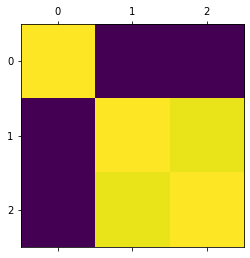

---------------------------------------------------------------------------------
Matriu de correlació amb el mètode "Seaborn.heatmap" :
---------------------------------------------------------------------------------


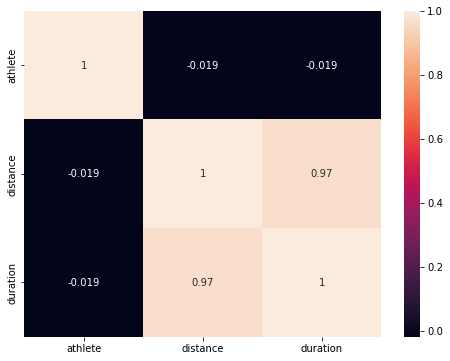

---------------------------------------------------------------------------------
Matriu de correlació amb el mètode "Dataframe.sytle" :
---------------------------------------------------------------------------------


,athlete,distance,duration
athlete,1.000000,-0.019185,-0.018832
distance,-0.019185,1.000000,0.967180
duration,-0.018832,0.967180,1.000000


In [24]:
##########################################################################
##           DATA SCIENCE: S06.T01: Nivell 2 Exercici 3                 ##
##########################################################################
# Exercici 3: Continuant amb les dades de tema esportiu, calcula la correlació
# de tots els atributs entre sí i representa'ls en una matriu amb diferents colors d'intensitat.

#generate a correlation dataframe with method "Dataframe.corr()"
corr_df = dfRunners20.corr()
display(dfRunners20)
display(corr_df)


print('---------------------------------------------------------------------------------')
print('Matriu de correlació amb el mètode "Matplotlib.pyplot.matshow" :')
print('---------------------------------------------------------------------------------')
plt.matshow(corr_df)
plt.show()

print('---------------------------------------------------------------------------------')
print('Matriu de correlació amb el mètode "Seaborn.heatmap" :')
print('---------------------------------------------------------------------------------')
plt.figure(figsize=(8, 6))
sns.heatmap(corr_df, annot=True)
plt.show()

print('---------------------------------------------------------------------------------')
print('Matriu de correlació amb el mètode "Dataframe.sytle" :')
print('---------------------------------------------------------------------------------')
corr_df.style.background_gradient(cmap='coolwarm')

In [25]:
##########################################################################
##           DATA SCIENCE: S06.T01: Nivell 3 Exercici 4                 ##
##########################################################################
# Exercici 4: Continuant amb les dades de tema esportiu, selecciona un atribut
# i calcula la mitjana geomètrica i la mitjana harmònica.

#Check that there isn't null values
print('Valors Null :',(dfRunners20['distance'].isnull()))
print('Valors Null :',(dfRunners20['duration'].isnull()))

df = dfRunners20

#Check that there isn't "0" values, because the geometric function don't suport values 0 or less than 0 
df['distance'] = df['distance'].apply(lambda x: x if x>=1 else 0.0001)
df['duration'] = df['duration'].apply(lambda x: x if x>=1 else 0.0001)
     
#Show the new dataframe with values channged    
display(df)

print('--------------distance-------------')
print('Mitja Geomètrica :',statistics.geometric_mean(df['distance']))
print('Mitja Armònica :',statistics.harmonic_mean(df['distance']))
print('-----------------------------------')

print('--------------duration-------------')
print('Mitja Geomètrica :',statistics.geometric_mean(dfRunners20['duration']))
print('Mitja Armònica :',statistics.harmonic_mean(df['duration']))
print('-----------------------------------')

Valors Null : 0         False
1         False
2         False
3         False
4         False
          ...  
436939    False
436940    False
436941    False
436942    False
436943    False
Name: distance, Length: 436944, dtype: bool
Valors Null : 0         False
1         False
2         False
3         False
4         False
          ...  
436939    False
436940    False
436941    False
436942    False
436943    False
Name: duration, Length: 436944, dtype: bool


,datetime,athlete,distance,duration,gender,age_group,country,major
0,2020-01-31,0,0.000100,0.000100,F,18 - 34,United States,CHICAGO 2019
1,2020-01-31,1,237.900000,1398.677419,M,35 - 54,Germany,BERLIN 2016
2,2020-01-31,2,106.267742,739.354839,M,35 - 54,United Kingdom,"LONDON 2018,LONDON 2019"
3,2020-01-31,3,203.758065,935.532258,M,18 - 34,United Kingdom,LONDON 2017
4,2020-01-31,4,94.558065,500.838710,M,35 - 54,United States,BOSTON 2017
...,...,...,...,...,...,...,...,...
436939,2020-12-31,37594,464.621613,2087.500000,M,18 - 34,United Kingdom,BERLIN 2017
436940,2020-12-31,37595,338.187097,1385.129032,M,18 - 34,United States,"BERLIN 2019,NEW YORK 2015"
436941,2020-12-31,37596,544.345161,2318.338710,M,18 - 34,United States,BOSTON 2017
436942,2020-12-31,37597,195.900000,1121.322581,F,18 - 34,United States,BOSTON 2015


--------------distance-------------
Mitja Geomètrica : 7.325661887015998
Mitja Armònica : 0.0005478102623076669
-----------------------------------
--------------duration-------------
Mitja Geomètrica : 30.721295612010213
Mitja Armònica : 0.0005501537553446209
-----------------------------------
